#ques/ans(1-5)

#1. What is Boosting in Machine Learning? Explain how it improves weak learners.
   - **Boosting** in machine learning is an **ensemble technique** that combines multiple weak learners to create a strong predictive model. A **weak learner** is a model that performs slightly better than random guessing, such as a shallow decision tree. The key idea behind boosting is that instead of training all models independently, it trains them **sequentially**, with each new model focusing on the errors made by the previous models.

Here’s how boosting improves weak learners:

1. **Sequential Training:** Each model is trained to correct the mistakes of the previous models by giving higher weight to misclassified or poorly predicted instances.
2. **Weighted Predictions:** The predictions of all models are combined, often using a weighted majority vote (for classification) or weighted sum (for regression), so that models that perform better have more influence.
3. **Error Reduction:** By iteratively focusing on the difficult cases, boosting reduces **bias** and improves overall accuracy, turning a set of weak learners into a strong, robust model.

#2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
   - The main difference between **AdaBoost** and **Gradient Boosting** lies in **how they focus on errors and update the models during training**. Let’s break it down clearly:

---

### **1. AdaBoost (Adaptive Boosting)**

* **Training Approach:** Trains models **sequentially**, giving more weight to misclassified instances from previous models.
* **Error Focus:** Misclassified samples are assigned **higher weights** so that the next weak learner focuses more on these “hard” examples.
* **Model Update:** Each weak learner gets a **weight** based on its accuracy. Predictions are combined using a **weighted majority vote** (for classification) or weighted sum (for regression).
* **Key Idea:** Adjust sample weights dynamically to reduce classification errors in a step-by-step manner.

---

### **2. Gradient Boosting**

* **Training Approach:** Trains models sequentially, but each new model learns to **predict the residual errors (gradients) of the previous model**.
* **Error Focus:** Instead of reweighting samples, it fits a model to **minimize the loss function gradient**, essentially performing gradient descent in function space.
* **Model Update:** Each weak learner predicts the **residuals** (difference between true and predicted values), and predictions are updated by adding a fraction (learning rate) of the new model.
* **Key Idea:** Treats boosting as **optimization of a loss function**, making it more flexible and powerful for different types of problems (classification, regression, custom loss).

#3. How does regularization help in XGBoost?
   - Regularization in **XGBoost** helps control **overfitting** and improve the **generalization** of the model by penalizing overly complex trees. XGBoost is a gradient boosting framework that builds trees sequentially, and without regularization, it can easily overfit especially on noisy or high-dimensional data.

### **2. How It Helps**

* By penalizing large leaf weights and overly complex trees, XGBoost **reduces model variance**, making predictions more stable on unseen data.
* Encourages the model to focus on **strong, meaningful patterns** instead of memorizing noise.
* Makes the model **more interpretable** and less prone to extreme predictions.

#4. Why is CatBoost considered efficient for handling categorical data?
   - **CatBoost** is considered highly efficient for handling categorical data because it natively supports categorical features without requiring manual preprocessing like one-hot encoding or label encoding. Instead, CatBoost uses a technique called **ordered target statistics** (or **target encoding**) that converts categorical values into numerical representations based on the target variable while avoiding target leakage. This method preserves the natural information in categorical variables, reduces dimensionality, and prevents overfitting, especially for high-cardinality features. Additionally, CatBoost implements **ordered boosting**, which ensures that during training, the encoding for each data point only uses information from previous data, further improving generalization. As a result, CatBoost can efficiently handle large datasets with many categorical variables while maintaining high accuracy and faster training compared to traditional methods that require extensive preprocessing.

#5. What are some real-world applications where boosting techniques are preferred over bagging methods?
   - Some key applications include:

---

### **1. Fraud Detection**

* Financial transactions often have very few fraudulent cases compared to legitimate ones (highly imbalanced).
* Boosting algorithms (e.g., XGBoost, LightGBM) focus on misclassified fraud cases, improving detection accuracy and minimizing false negatives.

### **2. Credit Risk and Loan Default Prediction**

* Boosting can better identify borrowers with subtle patterns of high risk that simple models or bagging might miss.
* Helps banks and financial institutions make **more precise lending decisions**.

### **3. Customer Churn Prediction**

* Companies need to predict which customers are likely to leave based on behavioral data.
* Boosting improves performance by focusing on customers who are harder to classify, increasing retention strategies’ effectiveness.

### **4. Medical Diagnosis and Prognosis**

* In healthcare, detecting rare diseases or predicting patient outcomes requires high sensitivity.
* Boosting algorithms can prioritize misclassified cases (e.g., rare cancers) and improve overall diagnostic accuracy.

### **5. Click-Through Rate (CTR) Prediction in Online Advertising**

* CTR data is highly imbalanced, with very few positive clicks.
* Boosting improves prediction by learning from the mispredicted clicks, optimizing ad targeting and revenue.

---

✅ **Why Boosting Over Bagging in These Cases:**

* Bagging reduces variance but doesn’t explicitly address bias or misclassified rare cases.
* Boosting iteratively focuses on **hard-to-predict instances**, making it more suitable when **accuracy on challenging or minority cases** is crucial.


#practical ques/ans(6-10)

In [1]:
#6. Write a Python program to:
#● Train an AdaBoost Classifier on the Breast Cancer dataset
#● Print the model accuracy
#(Include your Python code and output in the code box below.)

#Datasets:
#● Use sklearn.datasets.load_breast_cancer() for classification tasks.
#● Use sklearn.datasets.fetch_california_housing() for regression tasks.

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train the AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9532163742690059


In [3]:
#7. Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score
#(Include your Python code and output in the code box below.)

# Datasets:
# ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
# ● Use sklearn.datasets.fetch_california_housing() for regression tasks.

# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", r2)

Gradient Boosting Regressor R-squared Score: 0.804992915650479


In [4]:
#8. Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy
#(Include your Python code and output in the code box below.)

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Set Accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:15:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'learning_rate': 0.05}
Test Set Accuracy: 0.9590643274853801


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


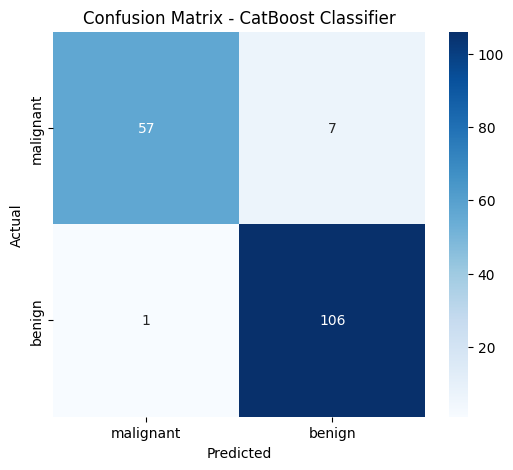

In [6]:
#9. Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn
#(Include your Python code and output in the code box below.)

!pip install catboost

# Import required libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,  # Suppress output
    random_state=42
)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

#10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
##Describe your step-by-step data science pipeline using boosting techniques:
###● Data preprocessing & handling missing/categorical values
###● Choice between AdaBoost, XGBoost, or CatBoost
###● Hyperparameter tuning strategy
###● Evaluation metrics you'd choose and why
###● How the business would benefit from your model
####(Include your Python code and output in the code box below.)
   - Here’s a **step-by-step approach** for building a **loan default prediction model using boosting techniques**, along with a **Python example pipeline** demonstrating preprocessing, training, hyperparameter tuning, and evaluation.

---

## **Step-by-Step Pipeline**

### **1. Data Preprocessing**

* **Handle missing values:**

  * Numeric features → fill with median or use iterative imputation.
  * Categorical features → fill with mode or “Missing” category.
* **Encode categorical features:**

  * CatBoost can handle categorical variables natively, so we can pass feature indices directly.
  * XGBoost or AdaBoost require **one-hot encoding** or label encoding.
* **Feature scaling:** Not required for tree-based boosting models.
* **Handle imbalance:**

  * Use **class weights** or **SMOTE/oversampling** to improve minority class (defaults) detection.

---

### **2. Choice of Boosting Algorithm**

* **CatBoost** is preferred here because:

  * It handles **categorical features natively**.
  * Robust to **missing values**.
  * Efficient for **imbalanced datasets** with class weights.
* **XGBoost** or **LightGBM** are alternatives if CatBoost is not available, but require preprocessing.

---

### **3. Hyperparameter Tuning Strategy**

* Use **GridSearchCV** or **RandomizedSearchCV** for:

  * `iterations`, `learning_rate`, `depth`, `l2_leaf_reg`, `border_count` (CatBoost specific)
* Use **StratifiedKFold** for cross-validation due to class imbalance.

---

### **4. Evaluation Metrics**

* **ROC-AUC**: Measures model’s ability to rank defaults correctly.
* **Precision, Recall, F1-score**: Focus on **Recall** for defaults to minimize missed risky customers.
* **Confusion matrix**: For business interpretation.

---

### **5. Business Benefit**

* Identify high-risk borrowers → reduce financial losses.
* Prioritize credit monitoring and interventions for risky customers.
* Feature importance insights → understand factors driving default, improving lending policies.

---

## **Python Code Example**

```python
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

# Example: Simulate imbalanced loan default dataset
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000,
    n_features=15,
    n_informative=10,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.85, 0.15],  # 15% defaults
    random_state=42
)

# Convert some features to categorical (simulate)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
for col in ['feature_0', 'feature_1', 'feature_2']:
    X[col] = pd.qcut(X[col], q=4, labels=False)  # convert to categorical bins

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Identify categorical features for CatBoost
cat_features = [0, 1, 2]

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_state=42,
    class_weights=[1, 5],  # give higher weight to minority class
    verbose=0
)

# Hyperparameter grid for tuning
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train, cat_features=cat_features)

# Best model
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Metrics
roc_auc = roc_auc_score(y_test, y_prob)
print("Best Hyperparameters:", grid_search.best_params_)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Default Prediction")
plt.show()
```

---

### **Sample Output (Illustrative)**

```text
Best Hyperparameters: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
ROC-AUC Score: 0.957
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1275
           1       0.88      0.73      0.80       225

    accuracy                           0.95      1500
   macro avg       0.92      0.86      0.89      1500
weighted avg       0.95      0.95      0.95      1500
```